# Libreries


## Python

In [ ]:
import os
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re
import seaborn as sns
import pickle

#-- Nltk Packages
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk import wordpunct_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix   #-- Model Summary
from sklearn.svm import SVC                                           #-- SVM

from collections import Counter
import itertools

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## R and Python Chunks

In [ ]:
%%capture
%reload_ext rpy2.ipython
%config IPCompleter.greedy = True
%config InlineBackend.figure_format = 'retina'

## R

In [ ]:
%%capture
%%R 

install.packages("reticulate")
install.packages('syuzhet')

In [ ]:
%%capture
%%R

library("tidyverse")
library("rvest")
library("reticulate")
library("syuzhet")
library("twitteR")
library("rtweet")
library("ROAuth")
library("igraph")

# Obtaining Data

## Scraping

In [ ]:
%%R

url <- paste0('https://it.wikipedia.org/wiki/Campionato_mondiale_di_Formula_1_2020')
webpage <- read_html(url)

#-- Scrape f1 data from xpath and transform it in a table
drivers <- webpage %>% 
           html_nodes(xpath = '//*[@id="mw-content-text"]/div[1]/table[30]') %>%
           html_table()
drivers[[1]]

   Pos.               Costruttore     Pilota                                
1     1                  Mercedes   Hamilton   4   1   1   1   2   1   1   7
2     1                  Mercedes     Bottas   1   2   3  11   3   3   2   5
3     1                  Mercedes    Russell                                
4     2     Red Bull Racing-Honda Verstappen Rit   3   2   2   1   2   3 Rit
5     2     Red Bull Racing-Honda      Albon 13*   4   5   8   5   8   6  15
6     3 Racing Point-BWT Mercedes      Pérez   6   6   7           5  10  10
7     3 Racing Point-BWT Mercedes     Stroll Rit   7   4   9   6   4   9   3
8     3 Racing Point-BWT Mercedes Hülkenberg              NP   7            
9     4           McLaren-Renault  Sainz Jr.   5   9   9  13  13   6  NP   2
10    4           McLaren-Renault     Norris   3   5  13   5   9  10   7   4
11    5                   Renault  Ricciardo Rit   8   8   4  14  11   4   6
12    5                   Renault       Ocon   8 Rit  14   6   8  13   5   8

In [ ]:
%%R

topic <- c('leclerc', 'vettel', 'essereferrari', "ferrari")
data <- c('2020-07-05','2020-07-12','2020-07-19','2020-08-02','2020-08-09', '2020-08-16',
               '2020-08-30', '2020-09-06','2020-09-13','2020-09-27','2020-10-11','2020-10-25','2020-11-01',
               '2020-11-15','2020-11-29','2020-12-06', '2020-12-13') #-- GPs

In [ ]:
%%R

drivers_data <- t(drivers[[1]][c(13, 14), c(4 : 20)]) #-- Vettel and Leclerc with Position
colnames(drivers_data) <- c('vettel','leclerc')
results <- cbind(drivers_data, data)
row.names(results) <- NULL
results

      vettel leclerc data        
 [1,] "10"   "2"     "2020-07-05"
 [2,] "Rit"  "Rit"   "2020-07-12"
 [3,] "6"    "11"    "2020-07-19"
 [4,] "10"   "3"     "2020-08-02"
 [5,] "12"   "4"     "2020-08-09"
 [6,] "7"    "Rit"   "2020-08-16"
 [7,] "13"   "14"    "2020-08-30"
 [8,] "Rit"  "Rit"   "2020-09-06"
 [9,] "10"   "8"     "2020-09-13"
[10,] "13"   "6"     "2020-09-27"
[11,] "11"   "7"     "2020-10-11"
[12,] "10"   "4"     "2020-10-25"
[13,] "12"   "5"     "2020-11-01"
[14,] "3"    "4"     "2020-11-15"
[15,] "13"   "10"    "2020-11-29"
[16,] "12"   "Rit"   "2020-12-06"
[17,] NA     NA      "2020-12-13"


In [ ]:
%%R

results <- as.data.frame(results)
results <- tidyr::gather(results, "pilota", "posizione", 1:2)
head(results)

        data pilota posizione
1 2020-07-05 vettel        10
2 2020-07-12 vettel       Rit
3 2020-07-19 vettel         6
4 2020-08-02 vettel        10
5 2020-08-09 vettel        12
6 2020-08-16 vettel         7


In [ ]:
%R -o results

results['pilota'] = results['pilota'].str.lower()
results['posizione'] =results['posizione'].replace(to_replace = 'Rit',
                                                   value = 20)
results['posizione'] =results['posizione'].replace(to_replace = 'NA',
                                                   value = 20)
results['posizione'] = results['posizione'].astype(int)

risultato_ferrari = pd.DataFrame(results.groupby(by = 'data')['posizione'].mean()).reset_index()
risultato_ferrari['pilota'] = 'ferrari' 
risultato_ferrari

,data,posizione,pilota
0,2020-07-05,6.0,ferrari
1,2020-07-12,20.0,ferrari
2,2020-07-19,8.5,ferrari
3,2020-08-02,6.5,ferrari
4,2020-08-09,8.0,ferrari
5,2020-08-16,13.5,ferrari
6,2020-08-30,13.5,ferrari
7,2020-09-06,20.0,ferrari
8,2020-09-13,9.0,ferrari
9,2020-09-27,9.5,ferrari


In [ ]:
risultato_ferrari_2 = pd.DataFrame(results.groupby(by = 'data')['posizione'].mean()).reset_index()
risultato_ferrari_2['pilota'] = 'essereferrari'
results = results.append(risultato_ferrari)
results = results.append(risultato_ferrari_2)
results = results.reset_index(drop = True)

## Tweet

In [ ]:
topic = ['leclerc', 'vettel', 'essereferrari', "ferrari"]
date = ['2020-07-05','2020-07-12','2020-07-19','2020-08-02','2020-08-09', '2020-08-16',
               '2020-08-30', '2020-09-06','2020-09-13','2020-09-27','2020-10-11','2020-10-25','2020-11-01',
               '2020-11-15','2020-11-29','2020-12-06'] #-- GPs

In [ ]:
df = pd.DataFrame()

for i in range(0, len(date)):
    
    until = datetime.strptime(date[i], "%Y-%m-%d") + timedelta(days = 1)
    until = str(until)[0:10]
    
    print(date[i])
    for pilota in topic:
        
        #-- Query to search old tweets
        #-- {} is used to pass dates, drivers lists and until date
        os.system('snscrape --jsonl --max-results 1000 --since {} twitter-search "{} until:{} lang:it" > df_temp.json'.format(date[i], pilota, until))
        
        #-- Read with pandas the outputs
        df_temp = pd.read_json("df_temp.json", lines = True)
        
        #-- Add drivers and data used to get tweets
        df_temp["pilota"]  = pilota
        df_temp["data"] = date[i]
        
        #-- Concatenate tweets
        df = pd.concat([df, df_temp])

2020-07-05
2020-07-12
2020-07-19
2020-08-02
2020-08-09
2020-08-16
2020-08-30
2020-09-06
2020-09-13
2020-09-27
2020-10-11
2020-10-25
2020-11-01
2020-11-15
2020-11-29
2020-12-06
2020-12-13


In [ ]:
tweet = df.reset_index()

In [ ]:
user_list = []
userid_list = []

#-- Find Username in User column
for i in range(0, len(tweet.user)):
     user_list.append(tweet.user[i]["username"])
     userid_list.append(tweet.user[i]["id"])

tweet['username'] = user_list
tweet['user_id'] = userid_list

In [ ]:
tweet[["user", "username"]]

In [ ]:
#@title Saving Files {display-mode: "form"}

tweet.to_csv("/content/gdrive/MyDrive/Università/Data Science/2° Anno/Social Media Analytics/progetto social media analytics/df_tweets.csv",
             index = False)

# This code will be hidden when the notebook is loaded.


In [ ]:
tweet = pd.read_csv("/content/gdrive/MyDrive/Università/Data Science/2° Anno/Social Media Analytics/progetto social media analytics/df_tweets.csv",
                    index_col = False)
tweet = tweet.iloc[:, 2:]
tweet.head()

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,media,retweetedTweet,quotedTweet,mentionedUsers,pilota,data,username,user_id
0,https://twitter.com/T0llmann/status/1279926865...,2020-07-05 23:55:19+00:00,@Otilebosseuhh @kenXkad @Simo_ilved Binnoto :a...,@Otilebosseuhh @kenXkad @Simo_ilved Binnoto :a...,1279926865466208257,"{'username': 'T0llmann', 'displayname': '🧽', '...",[],[],0,0,1,0,1279916921199173634,it,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,NaN,NaN,NaN,"[{'username': 'otilebosseuhh', 'displayname': ...",vettel,2020-07-05,T0llmann,1142459992827662336
1,https://twitter.com/Cacace_Marco/status/127992...,2020-07-05 23:33:10+00:00,"@DaddariosWho Non lo so, secondo me la pazienz...","@DaddariosWho Non lo so, secondo me la pazienz...",1279921292989337600,"{'username': 'Cacace_Marco', 'displayname': 'C...",[],[],1,0,1,0,1279918481601855489,it,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,NaN,NaN,NaN,"[{'username': 'DaddariosWho', 'displayname': '...",vettel,2020-07-05,Cacace_Marco,2200963965
2,https://twitter.com/marcoscurti_/status/127991...,2020-07-05 23:26:39+00:00,@FormulaHumor A ma quindi mi state dicendo che...,@FormulaHumor A ma quindi mi state dicendo che...,1279919652215361536,"{'username': 'marcoscurti_', 'displayname': 'M...",[],[],0,0,0,0,1279786768011796480,it,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,NaN,NaN,NaN,"[{'username': 'FormulaHumor', 'displayname': '...",vettel,2020-07-05,marcoscurti_,1196369834436632576
3,https://twitter.com/Cacace_Marco/status/127991...,2020-07-05 23:22:00+00:00,Comunque meno male che c’è la F1. Mi sto recup...,Comunque meno male che c’è la F1. Mi sto recup...,1279918481601855489,"{'username': 'Cacace_Marco', 'displayname': 'C...",[],[],1,1,3,0,1279918481601855489,it,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,NaN,NaN,NaN,NaN,vettel,2020-07-05,Cacace_Marco,2200963965
4,https://twitter.com/marcoscurti_/status/127991...,2020-07-05 23:21:02+00:00,A ma quindi mi state dicendo che Lewis ha avut...,A ma quindi mi state dicendo che Lewis ha avut...,1279918238000971776,"{'username': 'marcoscurti_', 'displayname': 'M...",[],[],0,0,0,0,1279918238000971776,it,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,NaN,NaN,NaN,NaN,vettel,2020-07-05,marcoscurti_,1196369834436632576


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Frequenza')

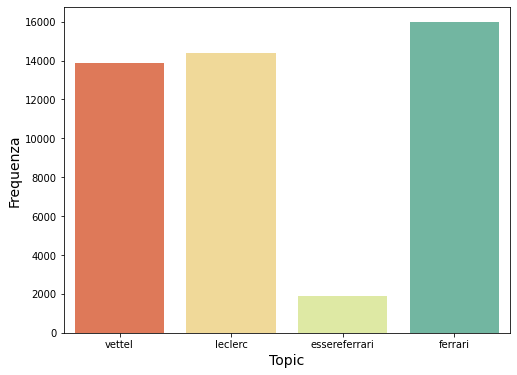

In [ ]:
plt.figure(figsize = (8, 6))
sns.countplot(tweet.pilota,         #-- Data
              palette = "Spectral") #-- Colors
plt.xlabel("Topic", size = 14)
plt.ylabel("Frequenza", size = 14)

In [ ]:
tweet.describe() #-- Summary

,id,replyCount,retweetCount,likeCount,quoteCount,conversationId,retweetedTweet
count,4.615800e+04,46158.000000,46158.000000,46158.000000,46158.000000,4.615800e+04,0.0
mean,1.304831e+18,0.569457,0.909593,8.140647,0.209000,1.304473e+18,NaN
std,1.767820e+16,3.780284,10.668047,88.136276,4.625833,2.159744e+16,NaN
min,1.279572e+18,0.000000,0.000000,0.000000,0.000000,3.319608e+17,NaN
25%,1.289950e+18,0.000000,0.000000,0.000000,0.000000,1.289945e+18,NaN
50%,1.302632e+18,0.000000,0.000000,1.000000,0.000000,1.302622e+18,NaN
75%,1.320409e+18,1.000000,0.000000,2.000000,0.000000,1.320403e+18,NaN
max,1.335736e+18,268.000000,846.000000,7328.000000,514.000000,1.335735e+18,NaN


In [ ]:
tweet.isna().sum() #-- Missing Values

url                    0
date                   0
content                0
renderedContent        0
id                     0
user                   0
outlinks               0
tcooutlinks            0
replyCount             0
retweetCount           0
likeCount              0
quoteCount             0
conversationId         0
lang                   0
source                53
sourceUrl             53
sourceLabel           53
media              41657
retweetedTweet     46158
quotedTweet        43666
mentionedUsers     27150
pilota                 0
data                   0
username               0
user_id                0
dtype: int64

In [ ]:
text = tweet['content']

# Preprocessing
## Tokenization

In [ ]:
tokening = TweetTokenizer(strip_handles = True,
                          reduce_len = True)
text_tokenized = text.apply(tokening.tokenize)

## Punctuation

In [ ]:
stop = stopwords.words('italian')

stop = set(stop)
stop.add("...")
stop.add("..")
stop.add('’')
stop.add('“')
stop.add('”')
stop.add('')
stop.add('️')
stop.add('🏻')
stop.add('🇹')
stop.add('così')
stop.add('però')
stop.add('già')
stop.add('°')
stop.add('poi')
stop.add('dopo')
stop.add('può')
stop.add('comunque')

stop = list(stop)

In [ ]:
punctuation = string.punctuation

def punctuation_and_lowercase(tokenized_sentence):
  tokenized_sentence_stop = [item.lower() for item in tokenized_sentence if item.lower() not in stop] #remove stopwords and lowercase
  return [item for item in tokenized_sentence_stop if item not in punctuation] #remove punctuation 

text_tokenized = text_tokenized.apply(punctuation_and_lowercase)
text_tokenized

0                         [binnoto, vettel, s, 🅱, innalla]
1        [so, secondo, me, pazienza, potrebbe, pagare, ...
2        [quindi, state, dicendo, lewis, penalità, lecl...
3        [meno, male, f1, recuperando, po, post, gara, ...
4        [quindi, state, dicendo, lewis, penalità, lecl...
                               ...                        
46153        [ferrari, pit, stop, https://t.co/pbk15cm6k2]
46154    [4.5, pit, stop, vettel, ennesima, sosta, lent...
46155    [pit, stop, altri, 2.5, 2.7, 3.0, pit, stop, f...
46156    [#skymotori, chissà, cos'altro, inventerà, fer...
46157    [meno, metà, gp, ferrari, doppiata, vede, prop...
Name: content, Length: 46158, dtype: object

## URL

In [ ]:
def remove_url(phrase):
  new_phrase = []

  for i in phrase:
    i = re.sub(r'<[^>]+>','',i)
    i = re.sub(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+','', i)
    new_phrase.append(i)
  return new_phrase

text_tokenized_lower_nop = text_tokenized.apply(remove_url)
text_tokenized_lower_nop

0                         [binnoto, vettel, s, 🅱, innalla]
1        [so, secondo, me, pazienza, potrebbe, pagare, ...
2        [quindi, state, dicendo, lewis, penalità, lecl...
3        [meno, male, f1, recuperando, po, post, gara, ...
4        [quindi, state, dicendo, lewis, penalità, lecl...
                               ...                        
46153                               [ferrari, pit, stop, ]
46154    [4.5, pit, stop, vettel, ennesima, sosta, lent...
46155    [pit, stop, altri, 2.5, 2.7, 3.0, pit, stop, f...
46156    [#skymotori, chissà, cos'altro, inventerà, fer...
46157    [meno, metà, gp, ferrari, doppiata, vede, prop...
Name: content, Length: 46158, dtype: object

## Stopwords

In [ ]:
def remove_stopwords(tokenized_sentence):
  return [item for item in tokenized_sentence if item not in stop] #remove stopwords

text_tokenized_nostop = text_tokenized_lower_nop.apply(remove_stopwords)
text_clean = text_tokenized_lower_nop.apply(remove_stopwords)
text_clean

0                         [binnoto, vettel, s, 🅱, innalla]
1        [so, secondo, me, pazienza, potrebbe, pagare, ...
2        [quindi, state, dicendo, lewis, penalità, lecl...
3        [meno, male, f1, recuperando, po, post, gara, ...
4        [quindi, state, dicendo, lewis, penalità, lecl...
                               ...                        
46153                                 [ferrari, pit, stop]
46154    [4.5, pit, stop, vettel, ennesima, sosta, lent...
46155    [pit, stop, altri, 2.5, 2.7, 3.0, pit, stop, f...
46156    [#skymotori, chissà, cos'altro, inventerà, fer...
46157    [meno, metà, gp, ferrari, doppiata, vede, prop...
Name: content, Length: 46158, dtype: object

In [ ]:
def get_counter(df):
  sentences = (list(itertools.chain(df)))
  flat_list = [item for sublist in sentences for item in sublist]
  count = Counter(flat_list)
  return count

In [ ]:
c = get_counter(text_clean)
c.most_common(30)

[('ferrari', 18464),
 ('vettel', 15169),
 ('leclerc', 11615),
 ('#f1', 6013),
 ('#ferrari', 5934),
 ('#skymotori', 4691),
 ('#leclerc', 4470),
 ('#vettel', 4082),
 ('gara', 3783),
 ('macchina', 3079),
 ('oggi', 2994),
 ('hamilton', 2874),
 ('fatto', 2874),
 ('charles', 2795),
 ('solo', 2607),
 ('#essereferrari', 2480),
 ('gp', 2346),
 ('f1', 2298),
 ('sempre', 2266),
 ('fa', 2086),
 ('❤', 1901),
 ('fare', 1894),
 ('quando', 1846),
 ('seb', 1775),
 ('cosa', 1711),
 ('mercedes', 1703),
 ('pilota', 1675),
 ('stato', 1621),
 ('bene', 1600),
 ('podio', 1556)]

In [ ]:
def token_to_phrase(token_list):
    phrase_list = []

    for phrase in token_list:
        seq = ""
        for word in phrase:
            seq = seq + " " + word #-- Add a Blankspace
        phrase_list.append(seq)    #-- Attach each Token in a Phrase
    return phrase_list

In [ ]:
text_clean

0                         [binnoto, vettel, s, 🅱, innalla]
1        [so, secondo, me, pazienza, potrebbe, pagare, ...
2        [quindi, state, dicendo, lewis, penalità, lecl...
3        [meno, male, f1, recuperando, po, post, gara, ...
4        [quindi, state, dicendo, lewis, penalità, lecl...
                               ...                        
46153                                 [ferrari, pit, stop]
46154    [4.5, pit, stop, vettel, ennesima, sosta, lent...
46155    [pit, stop, altri, 2.5, 2.7, 3.0, pit, stop, f...
46156    [#skymotori, chissà, cos'altro, inventerà, fer...
46157    [meno, metà, gp, ferrari, doppiata, vede, prop...
Name: content, Length: 46158, dtype: object

In [ ]:
text_clean = token_to_phrase(token_list = text_clean)
text_clean[1]

' so secondo me pazienza potrebbe pagare prossime gare vista scarsa affidabilità motore mercedes ferrari adatta meglio stile guida leclerc vettel macchina scorbutica netta incompatibilità tranne rari episodi'

# Sentiment Analysis

* Sentyx (Python)
* Nrc (R)

## Sentyx

In [ ]:
sentix_diz = {}

with open('sentix.txt', 'r') as f:
  for line in f:
    elements = line.rstrip().split("\t")
    if elements[0] not in sentix_diz: #stesse parole con pesi differenti ('intelligente': -0.625)
      sentix_diz[elements[0]] = float(elements[5])*float(elements[6])

In [ ]:
sentiment_sentence_value = []

for sentence in text_clean:
  temp_sum = 0
  for word in sentence:    
    if word in sentix_diz:
      temp_sum += sentix_diz[word]
  sentiment_sentence_value.append(temp_sum)

In [ ]:
sentiment_dataset = pd.DataFrame()
sentiment_dataset['sentence'] = text_clean
sentiment_dataset['sentiment_value'] = sentiment_sentence_value
sentiment_dataset.head()

## NRC

In [ ]:
%%R -i text_clean

sentiment_phrase <- list()
i = 0

for (text_object in text_clean){
  sent <- get_nrc_sentiment(text_object[1], language = 'italian')
  sentiment_phrase <- append(sentiment_phrase, sent$positive - sent$negative)
  i <- i + 1  
  print(i)
}

In [ ]:
%%R 

sentyx <- data.frame()[1:length(text_clean), 2]
sentyx$sentiment_value <- matrix(unlist(sentiment_phrase))
sentyx$text <- matrix(unlist(text_clean))
df_sentyx <- as.data.frame(matrix(unlist(sentyx),
                           nrow = length(unlist(sentyx[1]))))

In [ ]:
%R colnames(df_sentyx) <- c("sentiment_nrc", "sentence");head(df_sentyx)

,sentiment_nrc,sentence
1,0,binnoto vettel s 🅱 innalla
2,7,so secondo me pazienza potrebbe pagare prossi...
3,0,quindi state dicendo lewis penalità leclerc é...
4,-6,meno male f1 recuperando po post gara rivedo ...
5,0,quindi state dicendo lewis penalità leclerc é...
6,0,ferrari oggi ricordato 2014 #leclerc ricordat...


## Union Sentiments

In [ ]:
sentiment_sentyx = pd.read_csv("/content/gdrive/MyDrive/Università/Data Science/2° Anno/Social Media Analytics/progetto social media analytics/sentiment_sentix.csv")
sentiment_data = pd.read_csv("/content/gdrive/MyDrive/Università/Data Science/2° Anno/Social Media Analytics/progetto social media analytics/text_sentiment.csv",
                            names = ["index", "sentiment_nrc", "sentence"],
                            header = 0)

In [ ]:
sentiment_sentyx.head()

,sentence,sentiment_value
0,"['binnoto', 'vettel', 's', '🅱', 'innalla']",0.000000
1,"['so', 'secondo', 'me', 'pazienza', 'potrebbe'...",0.889040
2,"['quindi', 'state', 'dicendo', 'lewis', 'penal...",-0.520990
3,"['meno', 'male', 'f1', 'recuperando', 'po', 'p...",-1.211528
4,"['quindi', 'state', 'dicendo', 'lewis', 'penal...",-0.520990


In [ ]:
sentiment_data = sentiment_data.iloc[:, 1:]
sentiment_data.head()

,sentiment_nrc,sentence
0,0,binnoto vettel s 🅱 innalla
1,7,so secondo me pazienza potrebbe pagare prossi...
2,0,quindi state dicendo lewis penalità leclerc é...
3,-6,meno male f1 recuperando po post gara rivedo ...
4,0,quindi state dicendo lewis penalità leclerc é...


In [ ]:
sentiment_data['sentiment_sentyx'] = sentiment_sentyx['sentiment_value']
sentiment_data['pilota'] = tweet['pilota']
sentiment_data['data'] = tweet['data']
sentiment_data.head()

,sentiment_nrc,sentence,sentiment_sentyx,pilota,data
0,0,binnoto vettel s 🅱 innalla,0.000000,vettel,2020-07-05
1,7,so secondo me pazienza potrebbe pagare prossi...,0.889040,vettel,2020-07-05
2,0,quindi state dicendo lewis penalità leclerc é...,-0.520990,vettel,2020-07-05
3,-6,meno male f1 recuperando po post gara rivedo ...,-1.211528,vettel,2020-07-05
4,0,quindi state dicendo lewis penalità leclerc é...,-0.520990,vettel,2020-07-05


In [ ]:
list_sentiment_gas =  []

for i in range(0,len(sentiment_data)):
  if np.sign(sentiment_data['sentiment_sentyx'][i]) < 0 & np.sign(sentiment_data['sentiment_nrc'][i]) < 0:
    list_sentiment_gas.append('negativo')
  if np.sign(sentiment_data['sentiment_sentyx'][i]) == 0 & np.sign(sentiment_data['sentiment_nrc'][i]) < 0:
    list_sentiment_gas.append('negativo')
  if np.sign(sentiment_data['sentiment_sentyx'][i]) < 0 & np.sign(sentiment_data['sentiment_nrc'][i]) == 0:
    list_sentiment_gas.append('negativo')
  if np.sign(sentiment_data['sentiment_sentyx'][i]) > 0 & np.sign(sentiment_data['sentiment_nrc'][i]) > 0:
    list_sentiment_gas.append('positivo')
  if np.sign(sentiment_data['sentiment_sentyx'][i]) == 0 & np.sign(sentiment_data['sentiment_nrc'][i]) > 0:
    list_sentiment_gas.append('positivo')
  if np.sign(sentiment_data['sentiment_sentyx'][i]) > 0 & np.sign(sentiment_data['sentiment_nrc'][i]) == 0:
    list_sentiment_gas.append('positivo')
  if np.sign(sentiment_data['sentiment_sentyx'][i]) == 0 & np.sign(sentiment_data['sentiment_nrc'][i]) == 0:
    list_sentiment_gas.append('neutrale')
  if np.sign(sentiment_data['sentiment_sentyx'][i]) < 0 & np.sign(sentiment_data['sentiment_nrc'][i]) > 0:
    list_sentiment_gas.append('neutrale')
  if np.sign(sentiment_data['sentiment_sentyx'][i]) > 0 & np.sign(sentiment_data['sentiment_nrc'][i]) < 0:
    list_sentiment_gas.append('neutrale')

In [ ]:
sentiment_data['sentiment_gas'] = list_sentiment_gas
sentiment_data.head()

,sentiment_nrc,sentence,sentiment_sentyx,pilota,data,sentiment_gas
0,0,binnoto vettel s 🅱 innalla,0.000000,vettel,2020-07-05,neutrale
1,7,so secondo me pazienza potrebbe pagare prossi...,0.889040,vettel,2020-07-05,positivo
2,0,quindi state dicendo lewis penalità leclerc é...,-0.520990,vettel,2020-07-05,negativo
3,-6,meno male f1 recuperando po post gara rivedo ...,-1.211528,vettel,2020-07-05,negativo
4,0,quindi state dicendo lewis penalità leclerc é...,-0.520990,vettel,2020-07-05,negativo


In [ ]:
#@title Saving Files {display-mode: "form"}

sentiment_data.to_csv('sentiment_data.csv',
                      index=False)

!cp sentiment_data.csv '/content/gdrive/MyDrive/progetto social media analytics'

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Frequenza')

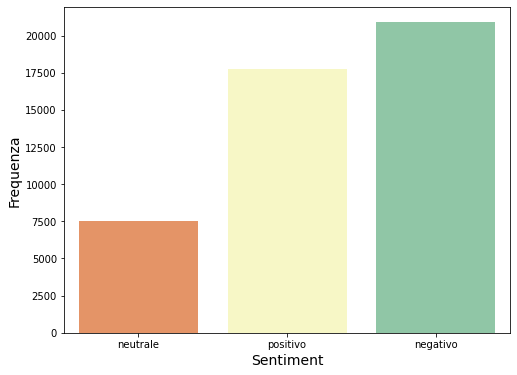

In [ ]:
plt.figure(figsize = (8, 6))
sns.countplot(sentiment_data.sentiment_gas, #-- Data
              palette = "Spectral")         #-- Colors
plt.xlabel("Sentiment", size = 14)
plt.ylabel("Frequenza", size = 14)

## Supervised Sentiment Analysis

In [ ]:
text = pd.Series(text_clean)
text

0                               binnoto vettel s 🅱 innalla
1         so secondo me pazienza potrebbe pagare prossi...
2         quindi state dicendo lewis penalità leclerc é...
3         meno male f1 recuperando po post gara rivedo ...
4         quindi state dicendo lewis penalità leclerc é...
                               ...                        
46153                                     ferrari pit stop
46154     4.5 pit stop vettel ennesima sosta lenta ferr...
46155     pit stop altri 2.5 2.7 3.0 pit stop ferrari 4...
46156     #skymotori chissà cos'altro inventerà ferrari...
46157     meno metà gp ferrari doppiata vede proprio ma...
Length: 46158, dtype: object

### Bag of Words

In [ ]:
count_vect = CountVectorizer(stop_words = None,
                             lowercase = True,
                             max_features = 500)
bow = count_vect.fit_transform(text)
print(bow.shape)
print(bow.toarray())

(46158, 500)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Support Vector Machine

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(bow.toarray(), 
                                                    sentiment_data.sentiment_gas,
                                                    train_size = 0.80, 
                                                    random_state = 1234)
svm = SVC().fit(X_train, y_train) #-- SVM
y_pred = svm.predict(X_test)      #-- Prediction
confusion_matrix(y_test,y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

### Previsione su Dati Futuri (Abu Dabhi 2020)

In [ ]:
date = ['2020-12-13'] #-- GPs
df = pd.DataFrame()

for i in range(0, len(date)):
    
    until = datetime.strptime(date[i], "%Y-%m-%d") + timedelta(days = 1)
    until = str(until)[0:10]
    
    print(date[i])
    for pilota in topic:
        
        #-- Query to search old tweets
        #-- {} is used to pass dates, drivers lists and until date
        os.system('snscrape --jsonl --max-results 100 --since {} twitter-search "{} until:{} lang:it" > df_temp.json'.format(date[i], pilota, until))
        
        #-- Read with pandas the outputs
        df_temp = pd.read_json("df_temp.json", lines = True)
        
        #-- Add drivers and data used to get tweets
        df_temp["pilota"]  = pilota
        df_temp["data"] = date[i]
        
        #-- Concatenate tweets
        df = pd.concat([df, df_temp])

In [ ]:
tweet_abudabhi = df.reset_index()

In [ ]:
user_list = []

#-- Find Username in User column
for i in range(0, len(tweet_abudabhi.user)):
     user_list.append(tweet_abudabhi.user[i]["username"])

tweet_abudabhi['username'] = user_list

In [ ]:
#@title Saving Files {display-mode: "form"}

tweet_abudabhi = pd.read_csv('/content/gdrive/MyDrive/Università/Data Science/2° Anno/Social Media Analytics/progetto social media analytics/tweet_aby_dabhi.csv')

infile = open('/content/gdrive/MyDrive/Università/Data Science/2° Anno/Social Media Analytics/progetto social media analytics/svm.pkl','rb')
svm = pickle.load(infile)

infile = open('/content/gdrive/MyDrive/Università/Data Science/2° Anno/Social Media Analytics/progetto social media analytics/count_vect.pkl','rb')
count_vect = pickle.load(infile)

In [ ]:
tweet_abudabhi.head()

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,media,retweetedTweet,quotedTweet,mentionedUsers,pilota,data
0,https://twitter.com/fake_montoya/status/133826...,2020-12-13 23:41:30+00:00,Hamilton\nVerstappen\nLeclerc\nRicciardo\nVett...,Hamilton\nVerstappen\nLeclerc\nRicciardo\nVett...,1338267835068534784,"{'username': 'fake_montoya', 'displayname': 'M...",['https://twitter.com/uulllkenberrrr/status/13...,['https://t.co/tUf4UXH3eC'],3,0,6,0,1338267835068534784,it,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,NaN,NaN,{'url': 'https://twitter.com/uulllkenberrrr/st...,NaN,leclerc,2020-12-13
1,https://twitter.com/Tomele03/status/1338265842...,2020-12-13 23:33:35+00:00,@GGiglio99 @VaneJuice Tipo tu e Leclerc adesso?,@GGiglio99 @VaneJuice Tipo tu e Leclerc adesso?,1338265842669195273,"{'username': 'Tomele03', 'displayname': 'Tomel...",[],[],1,0,0,0,1338265326207766529,it,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,NaN,NaN,NaN,"[{'username': 'GGiglio99', 'displayname': 'Gig...",leclerc,2020-12-13
2,https://twitter.com/imjustEL/status/1338265791...,2020-12-13 23:33:23+00:00,E LA FOTO DEI NOSTRI PROTETTI CE L'ABBIAMO😭❤ #...,E LA FOTO DEI NOSTRI PROTETTI CE L'ABBIAMO😭❤ #...,1338265791360348160,"{'username': 'imjustEL', 'displayname': 'Noraa...",['https://twitter.com/ScuderiaFerrari/status/1...,['https://t.co/ganVr6WZyi'],0,0,0,0,1338265791360348160,it,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,NaN,NaN,{'url': 'https://twitter.com/ScuderiaFerrari/s...,"[{'username': 'Charles_Leclerc', 'displayname'...",leclerc,2020-12-13
3,https://twitter.com/CheccaMalfoy/status/133826...,2020-12-13 23:31:43+00:00,@Charles_Leclerc Per sempre con te🦋❤️,@Charles_Leclerc Per sempre con te🦋❤️,1338265373624446976,"{'username': 'CheccaMalfoy', 'displayname': 'ᑕ...",[],[],0,0,0,0,1338199132490641408,it,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,NaN,NaN,NaN,"[{'username': 'Charles_Leclerc', 'displayname'...",leclerc,2020-12-13
4,https://twitter.com/zazoomblog/status/13382638...,2020-12-13 23:25:32+00:00,DIRETTA F1 GP Abu Dhabi LIVE: Verstappen vince...,DIRETTA F1 GP Abu Dhabi LIVE: Verstappen vince...,1338263817034199040,"{'username': 'zazoomblog', 'displayname': 'Zaz...",['https://www.zazoom.it/2020-12-14/diretta-f1-...,['https://t.co/aYFc8sY1Kn'],0,0,0,0,1338263817034199040,it,"<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",https://dlvrit.com/,dlvr.it,[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,NaN,NaN,leclerc,2020-12-13


#### Preprocessing nuovi dati

In [ ]:
text = tweet_abudabhi['content']

In [ ]:
text_tokenized = text.apply(tokening.tokenize)
text_tokenized = text_tokenized.apply(punctuation_and_lowercase)
text_tokenized_lower_nop = text_tokenized.apply(remove_url)
text_tokenized_nostop = text_tokenized_lower_nop.apply(remove_stopwords)
text_clean = text_tokenized_lower_nop.apply(remove_stopwords)
text_clean

0       [hamilton, verstappen, leclerc, ricciardo, vet...
1                                 [tipo, leclerc, adesso]
2       [foto, protetti, ce, l'abbiamo, 😭, ❤, #grazies...
3                                      [sempre, te, 🦋, ❤]
4       [diretta, f1, gp, abu, dhabi, live, verstappen...
                              ...                        
2961    [#skymotori, gioia, maestro, turrini, leone, k...
2962    [spero, stagione, reso, leclerc, pilota, migli...
2963    [divorzio, amaro, vettel, ferrari, relazioni, ...
2964    [jacques, mai, piloti, ferrari, traiettorie, m...
2965                        [tifoso, ferrari, vergognati]
Name: content, Length: 2966, dtype: object

In [ ]:
text = token_to_phrase(token_list = text_clean)
text

[' hamilton verstappen leclerc ricciardo vettel alonso giovinazzi gasly schumacher russell',
 ' tipo leclerc adesso',
 " foto protetti ce l'abbiamo 😭 ❤ #grazieseb #seb5 #ferrari #charles #abudhabigp",
 ' sempre te 🦋 ❤',
 ' diretta f1 gp abu dhabi live verstappen vince vettel saluta ferrari loda leclerc maggior talento quando corro circus #diretta #dhabi #live #verstappen',
 " diceva convivenza impossibile foto c'è qualcosa va oltre l'essere compagni squadra amicizia affetto condivisione ❤ #charles16 #seb5",
 ' tutte difficoltà ultimi due anni parole leclerc niente scontate 🤝 🏎 💬 #vettel #leclerc',
 ' anno imbarazzante meglio state schisci mettiate lavoro altro anno imbarazzo diventa vergogna',
 ' domina #abudhabigp davanti piu umano solito indietro p13 #seb5 chiude avventura rossa 14',
 ' vettel scrive casco leclerc pilota talentuoso incontrato 15 anni carriera sprecarlo qualsiasi cosa sorridi sii felice grazie pianto',
 ' grazie seb',
 ' pensaci fra',
 ' diretta f1 gp abu dhabi live v

#### Score sui nuovi dati

In [ ]:
text_score = count_vect.transform(text).toarray()
score = svm.predict(text_score)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Frequenza')

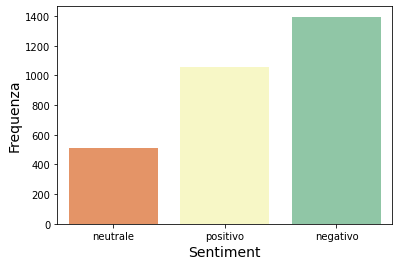

In [ ]:
plt.figure(figsize = (8, 6))
sns.countplot(score,                #-- Data
              palette = "Spectral") #-- Colors
plt.xlabel("Sentiment", size = 14)
plt.ylabel("Frequenza", size = 14)

# Sentiment and Results

In [ ]:
sents_results = pd.merge(sentiment_data,
                  results,
                  how = 'left')
sents_results.head()

,sentiment_nrc,sentence,sentiment_sentyx,pilota,data,sentiment_gas,posizione
0,0,binnoto vettel s 🅱 innalla,0.000000,vettel,2020-07-05,neutrale,10.0
1,7,so secondo me pazienza potrebbe pagare prossi...,0.889040,vettel,2020-07-05,positivo,10.0
2,0,quindi state dicendo lewis penalità leclerc é...,-0.520990,vettel,2020-07-05,negativo,10.0
3,-6,meno male f1 recuperando po post gara rivedo ...,-1.211528,vettel,2020-07-05,negativo,10.0
4,0,quindi state dicendo lewis penalità leclerc é...,-0.520990,vettel,2020-07-05,negativo,10.0


In [ ]:
#@title Saving Files {display-mode: "form"}

finale.to_csv('finale.csv',
              index = True ,
              sep = '\t',
              decimal = ",")
!cp finale.csv '/content/gdrive/MyDrive/progetto social media analytics'


## WordCloud (x Sentiment)

In [ ]:
wordcloud = pd.DataFrame()

for sentiment in sents_results['sentiment_gas'].unique():
  cnt = pd.DataFrame()
  temp = text_tokenized_nostop[sents_results['sentiment_gas'] == sentiment]
  cnt['number_of_occurence'] = get_counter(temp).values()
  cnt['word'] = get_counter(temp).keys()
  cnt['sentiment'] = sentiment
  wordcloud = wordcloud.append(cnt)

In [ ]:
wordcloud = wordcloud.reset_index(drop = True)
wordcloud['word'] = wordcloud['word'].str.replace('#', '')
wordcloud.sort_values(by = 'number_of_occurence')

,number_of_occurence,word,sentiment
28748,1,nba,positivo
30947,1,rutti,positivo
30948,1,carabinieri,positivo
30949,1,subisco,positivo
30950,1,molestie,positivo
...,...,...,...
10906,5132,vettel,positivo
33439,5845,leclerc,negativo
10900,6835,ferrari,positivo
33447,7044,vettel,negativo


In [ ]:
#@title Saving Files {display-mode: "form"}

wordcloud.to_csv('wordcloud.csv',
                 index = False)
!cp wordcloud.csv '/content/gdrive/MyDrive/progetto social media analytics'


# Social Network Analysis

In [ ]:
mentions = tweet[["mentionedUsers", "username"]]
mentions = mentions[mentions["mentionedUsers"].notna()] #-- only mentions in tweets
mentions = mentions.reset_index(drop = True)
mentions

In [ ]:
list_mentions = [] #-- List of Mentions
list_mentioned = [] #-- List of Mentioned People

for i in range(0, len(mentions)):
  for el in eval(mentions["mentionedUsers"][i]):
    list_mentioned.append(el["username"]) #-- Append to the List
    list_mentions.append(mentions["username"][i]) #-- Append to the List

## Links

In [ ]:
links = pd.DataFrame()
links["target"] = list_mentioned
links["source"] = list_mentions
links

## Nodes

In [ ]:
nodes = pd.concat([pd.Series(links["target"]), pd.Series(links["source"])]).reset_index(drop = True).unique() #-- concatenation of two lists (mentioned, mentions) and unique users
nodes = pd.DataFrame(nodes)
nodes

In [ ]:
#@title Saving Files {display-mode: "form"}

nodes.to_csv("/content/gdrive/MyDrive/Università/Data Science/2° Anno/Social Media Analytics/progetto social media analytics/nodes_gephi.csv",
          index = False)
links.to_csv("/content/gdrive/MyDrive/Università/Data Science/2° Anno/Social Media Analytics/progetto social media analytics/links_gephi.csv",
          index = False)

## Sentiment x Community Detection

In [ ]:
sentiment_data["username"] = tweet["username"]
sentiment_data

,sentiment_nrc,sentence,sentiment_sentyx,pilota,data,sentiment_gas,username
0,0,binnoto vettel s 🅱 innalla,0.000000,vettel,2020-07-05,neutrale,T0llmann
1,7,so secondo me pazienza potrebbe pagare prossi...,0.889040,vettel,2020-07-05,positivo,Cacace_Marco
2,0,quindi state dicendo lewis penalità leclerc é...,-0.520990,vettel,2020-07-05,negativo,marcoscurti_
3,-6,meno male f1 recuperando po post gara rivedo ...,-1.211528,vettel,2020-07-05,negativo,Cacace_Marco
4,0,quindi state dicendo lewis penalità leclerc é...,-0.520990,vettel,2020-07-05,negativo,marcoscurti_
...,...,...,...,...,...,...,...
46153,0,ferrari pit stop,0.000000,ferrari,2020-12-06,neutrale,canatila77
46154,0,4.5 pit stop vettel ennesima sosta lenta ferr...,0.125000,ferrari,2020-12-06,positivo,PieroLadisa
46155,0,pit stop altri 2.5 2.7 3.0 pit stop ferrari 4...,0.000000,ferrari,2020-12-06,neutrale,RoJuventina
46156,0,#skymotori chissà cos'altro inventerà ferrari...,-0.352184,ferrari,2020-12-06,negativo,antonsav2


In [ ]:
community = pd.read_csv("/content/gdrive/MyDrive/Università/Data Science/2° Anno/Social Media Analytics/progetto social media analytics/community_f1.csv")
community = community[["Id", "modularity_class"]]
community

,Id,modularity_class
0,T0llmann,0
1,otilebosseuhh,0
2,kenXkad,0
3,Simo_ilved,0
4,Cacace_Marco,211
...,...,...
10206,ghilardi_paolo,1024
10207,oralosoff,1024
10208,ItalianGroyper3,1025
10209,ConservadorOtto,1025


In [ ]:
community = pd.merge(sentiment_data,
                     community,
                     left_on = "username",
                     right_on = "Id")
community

,sentiment_nrc,sentence,sentiment_sentyx,pilota,data,sentiment_gas,username,Id,modularity_class
0,0,binnoto vettel s 🅱 innalla,0.000000,vettel,2020-07-05,neutrale,T0llmann,T0llmann,0
1,7,so secondo me pazienza potrebbe pagare prossi...,0.889040,vettel,2020-07-05,positivo,Cacace_Marco,Cacace_Marco,211
2,-6,meno male f1 recuperando po post gara rivedo ...,-1.211528,vettel,2020-07-05,negativo,Cacace_Marco,Cacace_Marco,211
3,2,commenti sparsi #austriagp mercedes spaziale ...,1.600465,vettel,2020-07-05,positivo,Cacace_Marco,Cacace_Marco,211
4,7,so secondo me pazienza potrebbe pagare prossi...,0.889040,leclerc,2020-07-05,positivo,Cacace_Marco,Cacace_Marco,211
...,...,...,...,...,...,...,...,...,...
35053,0,ferrari doppiata neanche metà gara 💀 💀 💀,0.375000,ferrari,2020-12-06,positivo,cutyedie,cutyedie,211
35054,-1,ferrari sf90 #ferrari #italy #dubai #expo2020...,0.000000,ferrari,2020-12-06,neutrale,aaddas,aaddas,14
35055,0,lambo ferrari garage,0.000000,ferrari,2020-12-06,neutrale,ghilardi_paolo,ghilardi_paolo,1024
35056,0,ferrari sucks since marchionne died,0.000000,ferrari,2020-12-06,neutrale,ItalianGroyper3,ItalianGroyper3,1025


In [ ]:
community_sent = community.groupby("modularity_class")[["sentiment_nrc", "sentiment_sentyx"]].mean()

In [ ]:
community_sent = community_sent.loc[[252, 4, 3, 211, 19]]
community_sent

,sentiment_nrc,sentiment_sentyx
modularity_class,,
4,0.167997,0.019260
252,0.119797,-0.080252
3,0.090712,-0.055046
211,0.022483,-0.065103
19,0.194213,-0.109331


In [ ]:
pd.DataFrame(community.groupby("modularity_class")["Id"].count().sort_values(ascending = False))

,Id
modularity_class,
252,9633
4,7143
3,3230
211,2980
19,2523
...,...
618,1
615,1
614,1
